In [1]:
import pandas as pd

In [12]:
overproof = '09November-analysed/ResultsGPT_overproof_Sample_09November.xlsx'

data = pd.read_excel(overproof)
data = data.fillna(" ")

In [13]:
data.head()

,language,filename,dataset_name,Degraded (y/n),Degradation Rate,Improved (y/n),Improvement Rate,Hallucination Rate,Response Rate,prompt,...,line-lev-improvement,quality-band-line-postprocessed,line-lev-pred-postprocessed,line-lev-improvement-postprocessed,article_id,File,Date,Type,NbAlignedChar,century
0,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,How does the model degrade the text?,True,Corrected but stopped after first sentence.,NaN,NaN,prompt_complex_02,...,-0.968504,80-99%,0.736842,-0.214035,29764000 year 1946 type Article title The Sydn...,NaN,NaN,NaN,NaN,NaN
1,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,NaN,False,Corrected but stopped after first sentence.,NaN,NaN,prompt_complex_02,...,-0.968504,80-99%,0.736842,-0.214035,29764000 year 1946 type Article title The Sydn...,NaN,NaN,NaN,NaN,NaN
2,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,How does the model degrade the text?,True,"Corrected, but the groundtruth contains errors.",NaN,NaN,prompt_complex_02,...,-0.968811,80-99%,0.700000,-0.253333,29764000 year 1946 type Article title The Sydn...,NaN,NaN,NaN,NaN,NaN
3,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,NaN,True,NaN,NaN,NaN,prompt_complex_02,...,-0.968811,80-99%,0.700000,-0.253333,29764000 year 1946 type Article title The Sydn...,NaN,NaN,NaN,NaN,NaN
4,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,How does the model degrade the text?,True,"Corrected, but the groundtruth contains errors.",NaN,NaN,prompt_complex_02,...,0.000000,80-99%,0.937500,0.000000,29764000 year 1946 type Article title The Sydn...,NaN,NaN,NaN,NaN,NaN


In [14]:
data.columns

Index(['language', 'filename', 'dataset_name', 'Degraded (y/n)',
       'Degradation Rate', 'Improved (y/n)', 'Improvement Rate',
       'Hallucination Rate', 'Response Rate', 'prompt', 'model',
       'groundtruth.line', 'ocr.line', 'prediction.line',
       'prediction.line.postprocessed', 'prediction.sentence',
       'groundtruth.sentence', 'prediction.sentence.postprocessed',
       'ocr.sentence', 'ocr.region', 'groundtruth.region', 'prediction.region',
       'prediction.region.postprocessed', 'prompt_text', 'type', 'file',
       'name_of_file_idx', 'post-processings', 'length_prediction_tokens',
       'length_ocr_tokens', 'length_groundtruth_tokens',
       'length_groundtruth_chars', 'length_prediction_chars',
       'length_ocr_chars', 'sentence-lev-ocr', 'sentence-lev-pred',
       'sentence-lev-improvement', 'quality-band-sentence-postprocessed',
       'sentence-lev-pred-postprocessed',
       'sentence-lev-improvement-postprocessed', 'region-lev-ocr',
       'region-lev

In [15]:
# Analyzing the data per model and per prompt
grouped_data = data.groupby(['model', 'prompt'])

# Calculating metrics like Degradation Rate and Improvement Rate
# Assuming 'Degradation Rate' and 'Improvement Rate' are columns in your dataset
# Here we calculate the mean, but you can calculate other statistics as needed
degradation_rate_mean = grouped_data['Degraded (y/n)'].mean()
improvement_rate_mean = grouped_data['Improved (y/n)'].mean()

# Display the results
print("Degradation Rate per Model and Prompt:")
print(degradation_rate_mean)
print("\nImprovement Rate per Model and Prompt:")
print(improvement_rate_mean)

# Further statistical analysis can be done as needed


Degradation Rate per Model and Prompt:
model        prompt           
BLOOMZ-7.1B  prompt_basic_02      0.87
             prompt_complex_02    0.06
GPT-4        prompt_basic_02      0.08
             prompt_complex_02    0.01
LLAMA-2-7B   prompt_basic_02      0.91
             prompt_complex_02    0.14
Name: Degraded (y/n), dtype: float64

Improvement Rate per Model and Prompt:
model        prompt           
BLOOMZ-7.1B  prompt_basic_02      0.12
             prompt_complex_02    0.93
GPT-4        prompt_basic_02      0.92
             prompt_complex_02    0.99
LLAMA-2-7B   prompt_basic_02      0.08
             prompt_complex_02    0.86
Name: Improved (y/n), dtype: float64


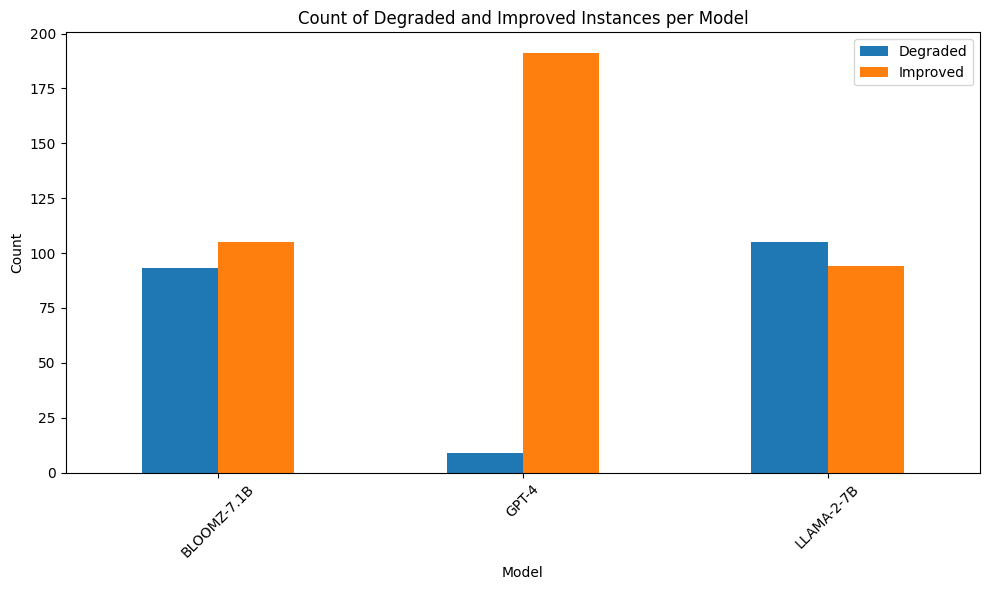

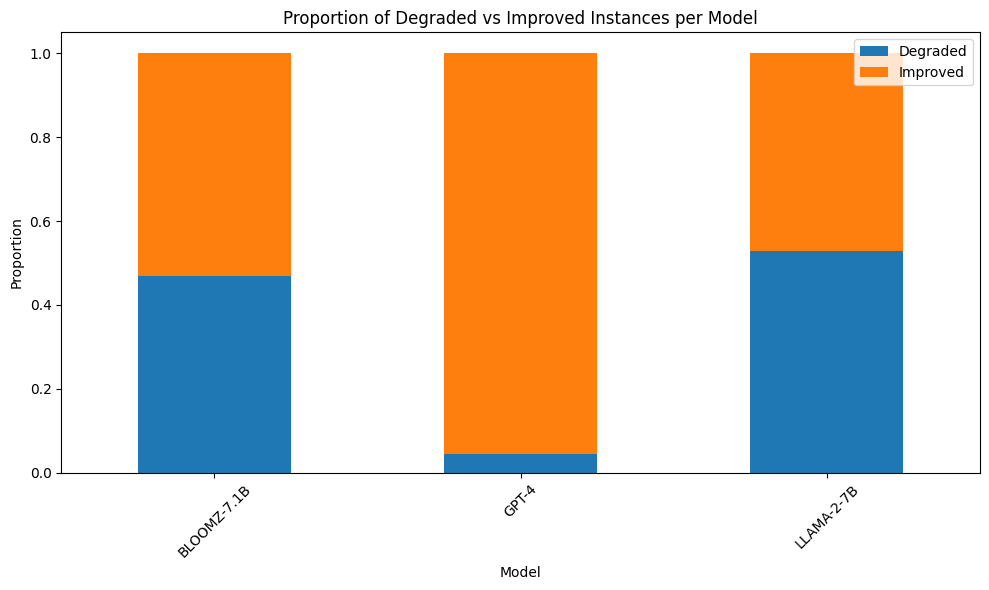

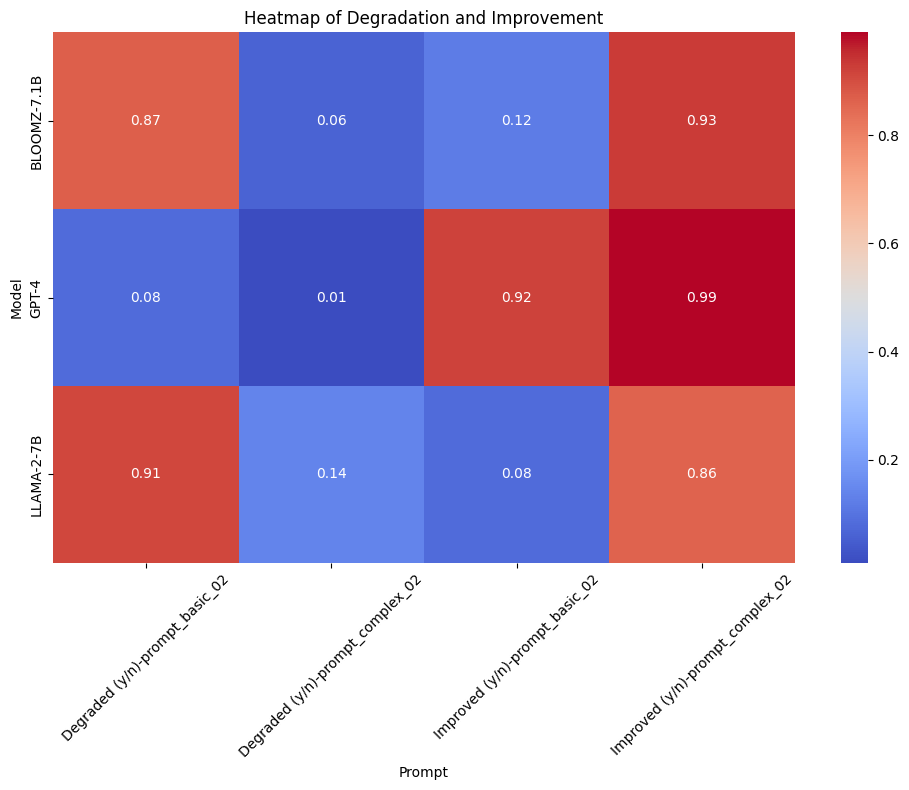

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Degraded (y/n)' and 'Improved (y/n)' to Boolean if they are not already
data['Degraded (y/n)'] = data['Degraded (y/n)'].astype(bool)
data['Improved (y/n)'] = data['Improved (y/n)'].astype(bool)

# Bar Plot: Count of Degraded and Improved per Model
plt.figure(figsize=(10, 6))
degraded_count = data.groupby('model')['Degraded (y/n)'].sum()
improved_count = data.groupby('model')['Improved (y/n)'].sum()
count_df = pd.DataFrame({'Degraded': degraded_count, 'Improved': improved_count})
count_df.plot(kind='bar', ax=plt.gca())
plt.title('Count of Degraded and Improved Instances per Model')
plt.ylabel('Count')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Stacked Bar Plot: Proportion of Degraded vs Improved per Model
plt.figure(figsize=(10, 6))
prop_df = count_df.div(count_df.sum(axis=1), axis=0)
prop_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Degraded vs Improved Instances per Model')
plt.ylabel('Proportion')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Heatmap: Degradation and Improvement Across Models and Prompts
plt.figure(figsize=(10, 8))
pivot_table = pd.pivot_table(data, values=['Degraded (y/n)', 'Improved (y/n)'], index='model', columns='prompt', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Degradation and Improvement')
plt.ylabel('Model')
plt.xlabel('Prompt')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


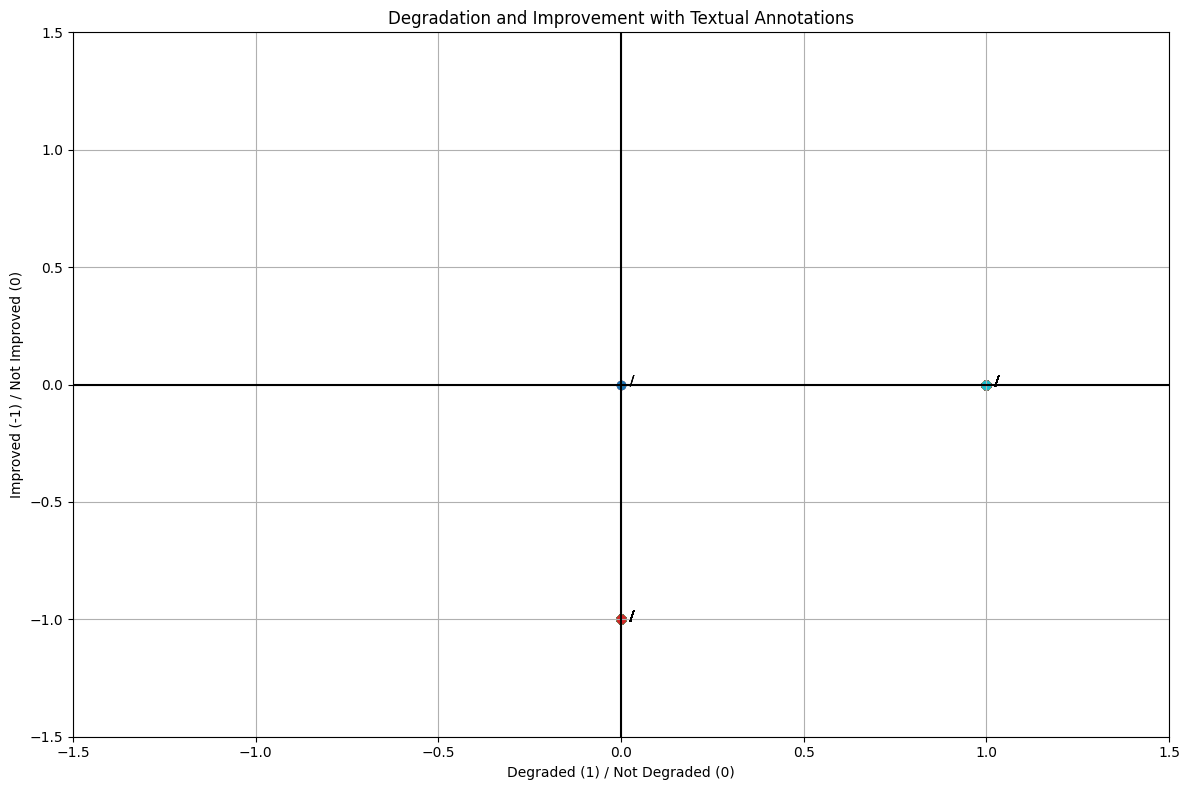

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for plotting
# Convert 'Degraded (y/n)' and 'Improved (y/n)' to numeric for plotting
data['Degraded_Num'] = data['Degraded (y/n)'].astype(int)  # 0 for False, 1 for True
data['Improved_Num'] = data['Improved (y/n)'].astype(int) * -1  # 0 for False, -1 for True

# Create a scatter plot
plt.figure(figsize=(12, 8))
for _, row in data.iterrows():
    plt.scatter('Degraded_Num', 'Improved_Num', data=row, marker='o')
    # Annotate with text from 'Degradation Rate' and 'Improvement Rate'
    
    text = f"{row['Degradation Rate']} / {row['Improvement Rate']}"
    
    plt.text(row['Degraded_Num'], row['Improved_Num'], text)

# Customize the plot
plt.xlabel('Degraded (1) / Not Degraded (0)')
plt.ylabel('Improved (-1) / Not Improved (0)')
plt.title('Degradation and Improvement with Textual Annotations')
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
data['Degraded_Num']

0      0
1      0
2      0
3      0
4      0
      ..
595    1
596    1
597    1
598    1
599    1
Name: Degraded_Num, Length: 600, dtype: int64

In [24]:
data

,language,filename,dataset_name,Degraded (y/n),Degradation Rate,Improved (y/n),Improvement Rate,Hallucination Rate,Response Rate,prompt,...,line-lev-pred-postprocessed,line-lev-improvement-postprocessed,article_id,File,Date,Type,NbAlignedChar,century,Degraded_Num,Improved_Num
0,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,,True,,,,prompt_complex_02,...,0.736842,-0.214035,29764000 year 1946 type Article title The Sydn...,,,,,,0,-1
1,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,,False,,,,prompt_complex_02,...,0.736842,-0.214035,29764000 year 1946 type Article title The Sydn...,,,,,,0,0
2,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,,True,,,,prompt_complex_02,...,0.700000,-0.253333,29764000 year 1946 type Article title The Sydn...,,,,,,0,-1
3,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,,True,,,,prompt_complex_02,...,0.700000,-0.253333,29764000 year 1946 type Article title The Sydn...,,,,,,0,-1
4,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,,True,,,,prompt_complex_02,...,0.937500,0.000000,29764000 year 1946 type Article title The Sydn...,,,,,,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,en,../../data/datasets/ocr/original/overproof/dat...,overproof,True,,False,,Instruction inconsistency (LLM does not do wha...,,prompt_basic_02,...,0.581818,-0.349733,4 year 1871 type Article title THE CARIRO DAIL...,,,,,,1,0
596,en,../../data/datasets/ocr/original/overproof/dat...,overproof,True,,False,,Context inconsistency (the content of the LLM ...,,prompt_basic_02,...,0.218182,-0.756150,4 year 1871 type Article title THE CARIRO DAIL...,,,,,,1,0
597,en,../../data/datasets/ocr/original/overproof/dat...,overproof,True,,False,,Context inconsistency (the content of the LLM ...,,prompt_basic_02,...,0.218182,-0.756150,4 year 1871 type Article title THE CARIRO DAIL...,,,,,,1,0
598,en,../../data/datasets/ocr/original/overproof/dat...,overproof,True,,False,,Context inconsistency (the content of the LLM ...,,prompt_basic_02,...,0.842105,-0.058824,4 year 1871 type Article title THE CARIRO DAIL...,,,,,,1,0
